# <font color=green>**Universidad Nacional Autónoma de México**
# <font color=green>**Facultad de Ciencias, semestre 2023-1**
# <font color=greenn> **Proyecto Final** 

### <font color=green> **Elaboró:**


*   <font color=greenn> Olvera Trejo Alberto
*   <font color=greenn> Ramos López Gabriela



In [1]:
#Importamos todas las librerias a usar
# !pip install -U kaleido
import numpy as np
from sympy import *
import sympy as sym
import matplotlib.pyplot as plt
from more_itertools import sort_together
from IPython.display import display, Latex
import plotly.graph_objects as go
from math import sqrt
import pandas as pd
import kaleido
import plotly.io as pio

### <font color=greenn> **Interpolación Polinomial**

**Ejercicio 1.** Se conoce como subocupación laboral a la situación en que personas de 15 y más años de edad que tienen la necesidad y disponibilidad de ofertar más horas de trabajo de lo que su ocupación actual les permite (INEGI)”. Ahora bien, el archivo “porcentaje-subocupacion” muestra la tasa o porcentaje de subocupación en México por trimestre desde el año 2006 hasta la actualidad. Con esta información realiza lo siguiente:

*   Elabora un programa que genere un polinomio $P(x)$ que interpole los datos mencionados


In [5]:
def polLagrange(X, Y):
  n = len(X)

  #Construimos los multiplicadores
  list_multi = []
  
  #Creamos el simbolo x
  x = symbols('x')
  for i in range(n):
    multi = 1
    for j in range(n):
      if i != j:
        multi = multi * ((x - X[j])/(X[i] - X[j]))

      #Lo agragamos a la lista
    list_multi.append(multi)

  #Creamos el polinomio
  polinomio = 0
  for i in range(n):
    polinomio += Y[i]*list_multi[i]

  #Titulo de la grafica
  latexpol =f'$P(x) = {latex(polinomio)}$'
  print("***Polinomio\n")
  # display(Latex(latexpol))

  #Graficamos
  xgraf = np.linspace(0, len(X) - 1, len(X))
  ygraf = [float(polinomio.subs(x, xi)) for xi in xgraf]

  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = xgraf, y = ygraf, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = Y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Polinomio de Lagrange",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg') 

In [6]:
# Cargamos los datos con Pandas
subocupacion_ruta = 'https://raw.githubusercontent.com/Alberto0410/Proyecto-Final-An-lisis-Num-rico/main/porcentaje-subocupacion.csv'
subocupacion = pd.read_csv(subocupacion_ruta, encoding='latin-1')

#Limpiamos los datos
subocupacion = subocupacion.iloc[:,:2]
subocupacion = subocupacion[:-7]

#Tomamos los datos que nos interesan (2006 - 2022)
subocup = subocupacion.drop([0, 1, 2, 3])

#Asociamos a cada trimestre un numero empezando con 0
trim_num = [i for i in range(len(subocup))]
subocup['Num de trimestre'] = trim_num

#Mostramos los primeros datos
subocup.head()

,Periodos,Indicadores economicos de coyuntura,Num de trimestre
4,2006/01,5.947211,0
5,2006/02,6.151413,1
6,2006/03,8.316103,2
7,2006/04,7.120753,3
8,2007/01,7.559234,4


*   Grafica el polinomio interpolante y los datos de desocupación


***Polinomio



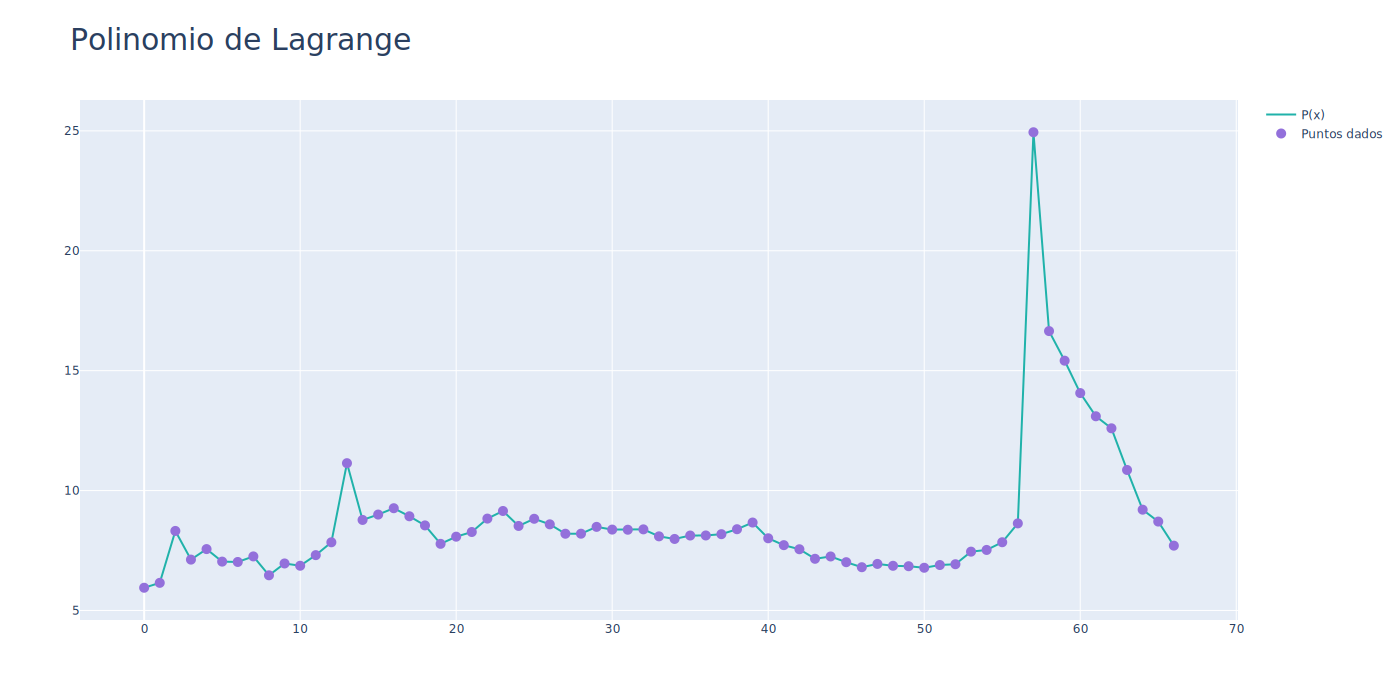

In [7]:
x = subocup.values[0:, 2].astype(float)
y = subocup.values[0:, 1].astype(float)

polLagrange(x, y)

*   ¿Cómo se interpreta lo que sucede en al año 2020?

El Indicador Ecónomico de Coyuntura alcanza su máximo en el año 2020, notemos que en el período 2020/01 (trimestre 56) tenemos que el IEC es de **8.631191878** y en el período 2020/02 (trimestre 57) tenemos que el IEC es de **24.94252061**, es decir tuvimos un aumento de **16.3113287** en 3 meses, lo cuál implica que la población que está en búsqueda activa de un trabajo aumento.

### <font color=greenn> **Ajuste por mínimos cuadrados lineales**
**Ejercicio 2.** El archivo “crecimiento-PBI" contiene información por trimestre del crecimiento del Producto Interno Bruto del país, desde el año 2019 hasta la actualidad. Con estos datos realiza lo siguiente:

a) Elabora un programa que genere polinomios $P(x)$ de grado $n = 0, 1, 2, 3, · · · , 10$ que ajusten los datos anteriores. Asigna el nodo $x = 0$ al trimestre $1$ del año 2019, el nodo $x = 1$ el trimestre 2 de 2019 y así sucesivamente. Para cada polinomio calcula los residuales.

b) Muestra la gráfica de cada polinomio junto con los datos ajustados.

In [8]:
def ec_norma_grad(X, y, grad):
  #Transformamos en arrays
  X = np.array(X)
  y_vec = np.array(y).reshape(len(y), 1)
  n = len(X)
  #Matriz de Vandermonde
  A = np.zeros((n, grad + 1))

  #Llenamos la matriz
  for i in range(n):
    for j in range(grad + 1):
      A[i, j] = X[i]**j

  At = np.transpose(A)

  #B = A^t *A, z = A^t*y
  B = np.matmul(At, A)
  z = np.matmul(At, y_vec)

  #Descomponemos A^t*A con Cholesky
  L = np.linalg.cholesky(B)
  
  #Resolvemos L*x_0 = A^t*y
  x_0 = np.linalg.solve(L, z)

  #Ahora resolvemos L^t*a = x_0
  a = np.linalg.solve(np.transpose(L), x_0)
  
  #Imprimimos el polinomio y creamos los arreglos para graficar
  x = sym.Symbol('x')
  x_graf = np.linspace(min(X), max(X), 200)
  pol = 0
  
  #Diferenciamos el caso cuando el grado es cero y cuando no lo es
  residuo = 0

  if grad == 0:
    pol = a[0]
    y_graf = [float(a[0]) for xi in x_graf]
    y_pol = np.array([float(a[0]) for xi in X]) 
    residuo = sum((y - y_pol)**2)

  else:
    for i in range(grad + 1):
      pol += float(a[i])*x**i
    y_graf = [float(pol.subs(x, xi)) for xi in x_graf]
    y_pol = np.array([float(pol.subs(x, xi)) for xi in X])
    residuo = sum((y - y_pol)**2)

  latexpol =f'$P(x) = {latex(pol)}$'
  print("***Polinomio\n")
  display(Latex(latexpol))

  # Graficamos 
  fig = go.Figure()

  fig.add_trace(
      go.Scatter(x = x_graf, y = y_graf, mode = 'lines',
                 marker=dict(color="LightSeaGreen"), name = 'P(x)')
      )

  fig.add_trace(
      go.Scatter(x = X, y = y, mode = 'markers',
                 marker=dict(size=10, color="MediumPurple"), name = 'Puntos dados')
      )
  fig.update_layout(title_text="Ajuste de minimos cuadrados",
                  title_font_size=30, width=1400, height=700)
  fig.show(renderer = 'svg')

  #Calculamos el residuo
  

  return residuo


***Polinomio



<IPython.core.display.Latex object>

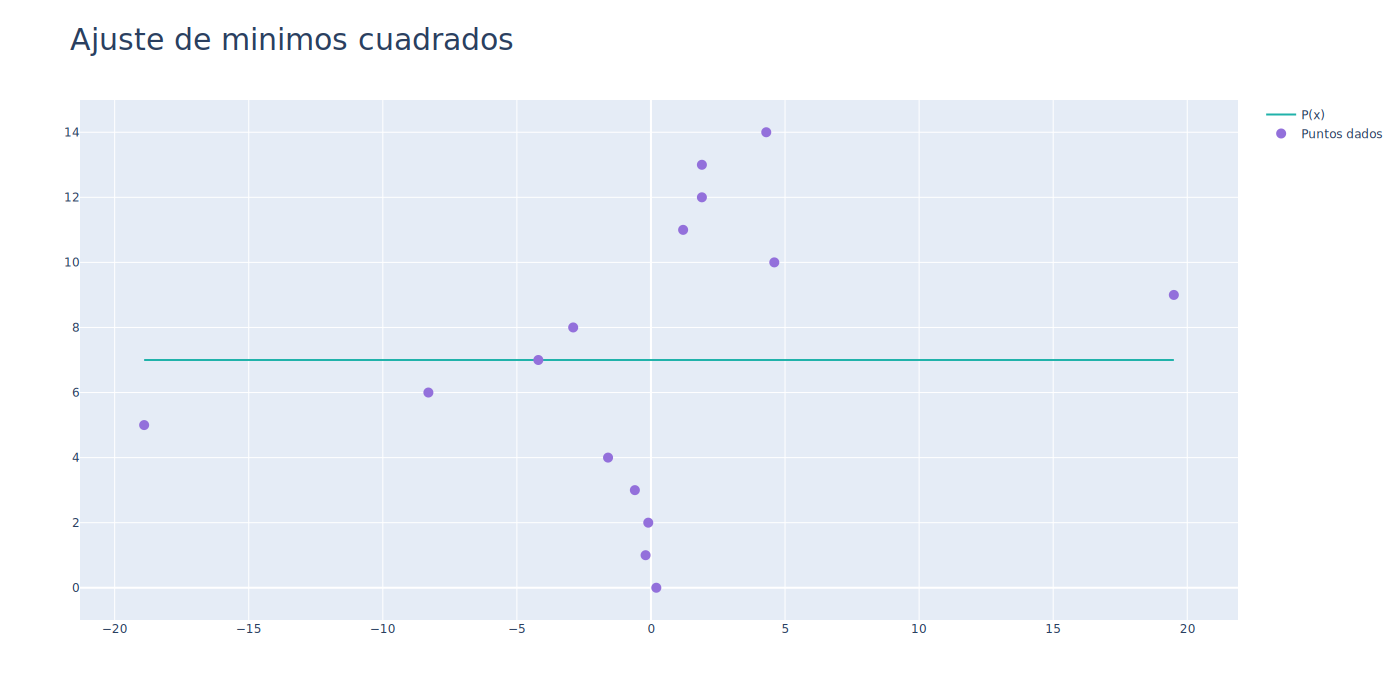

***Polinomio



<IPython.core.display.Latex object>

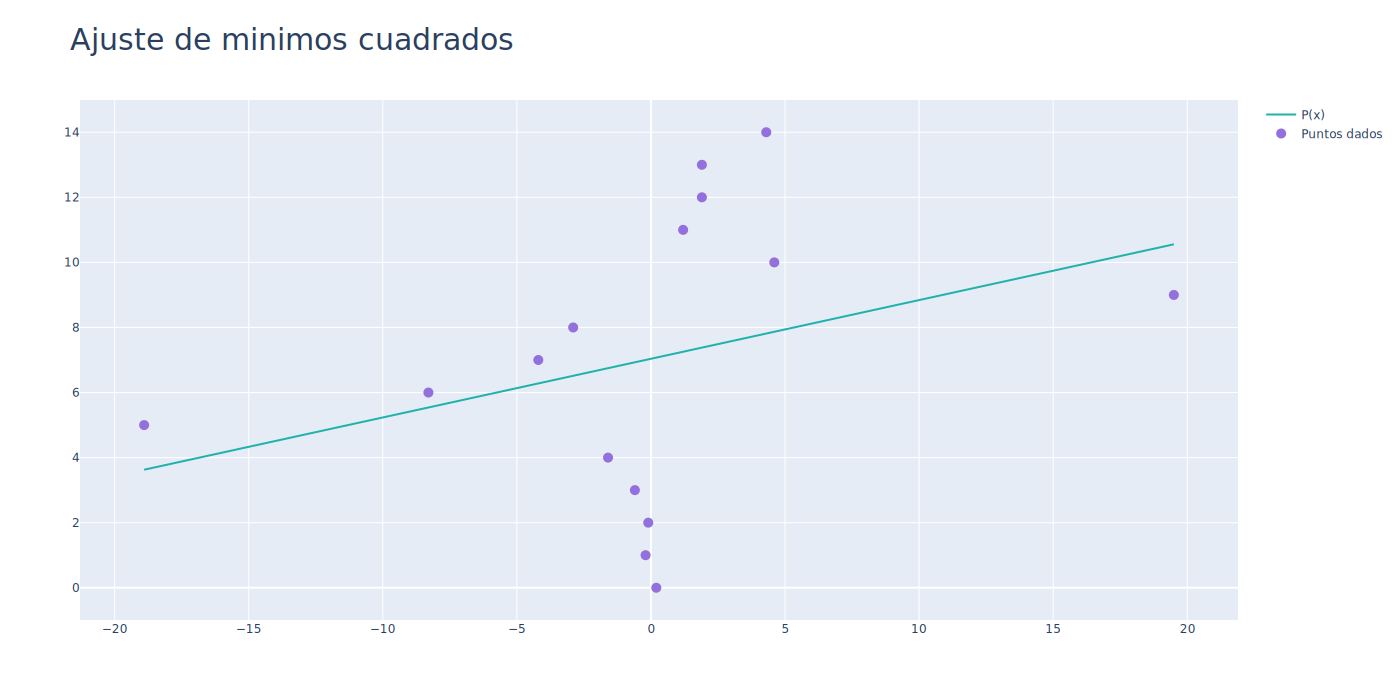

***Polinomio



<IPython.core.display.Latex object>

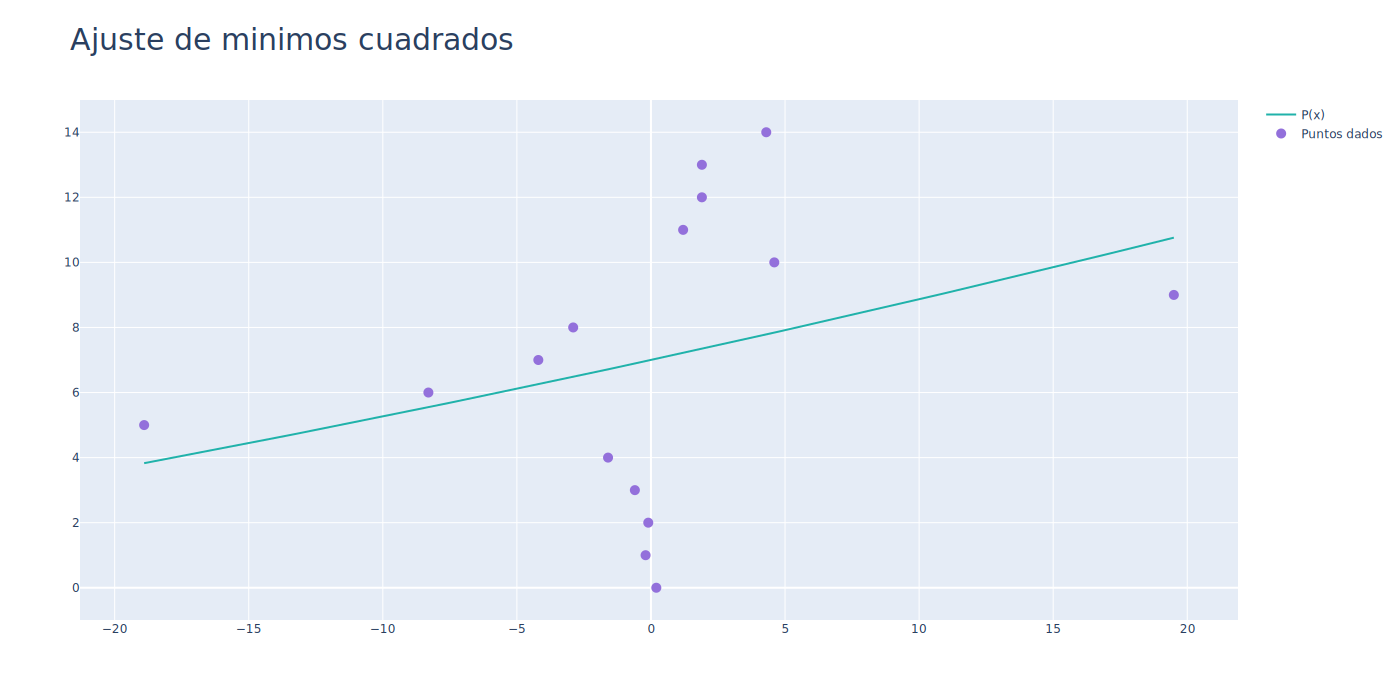

***Polinomio



<IPython.core.display.Latex object>

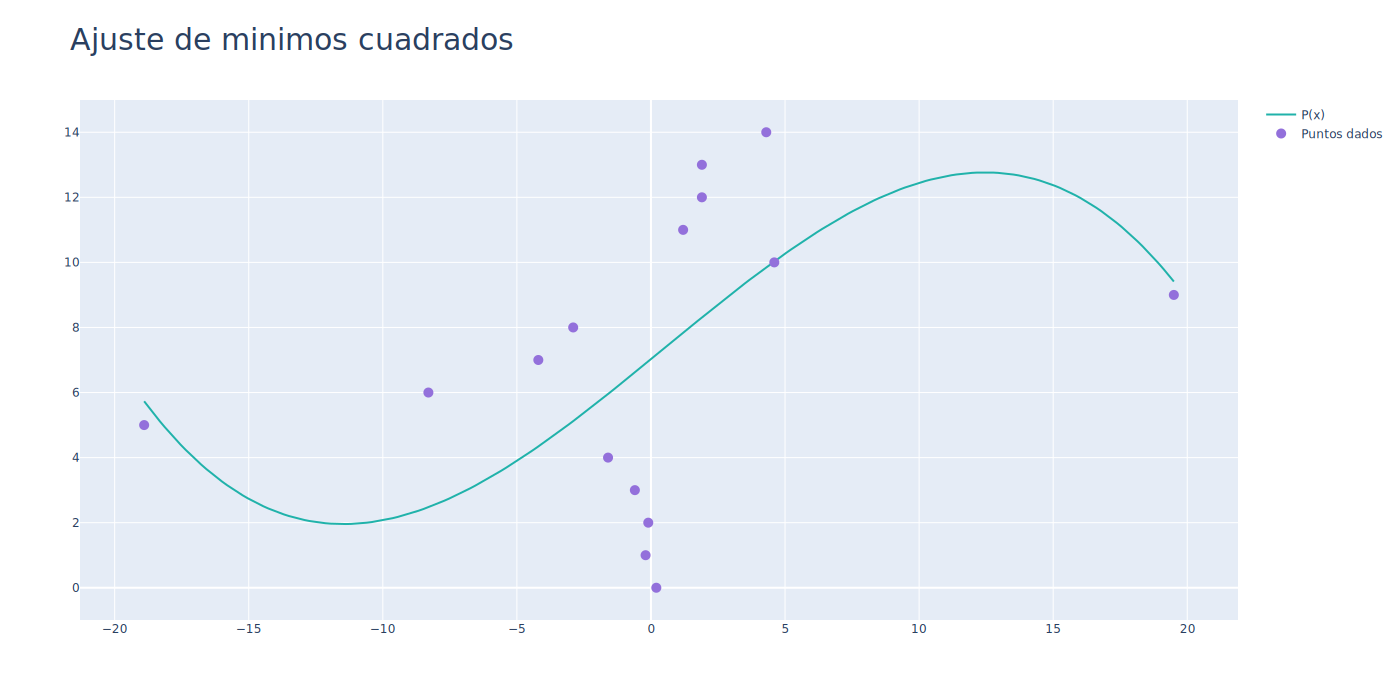

***Polinomio



<IPython.core.display.Latex object>

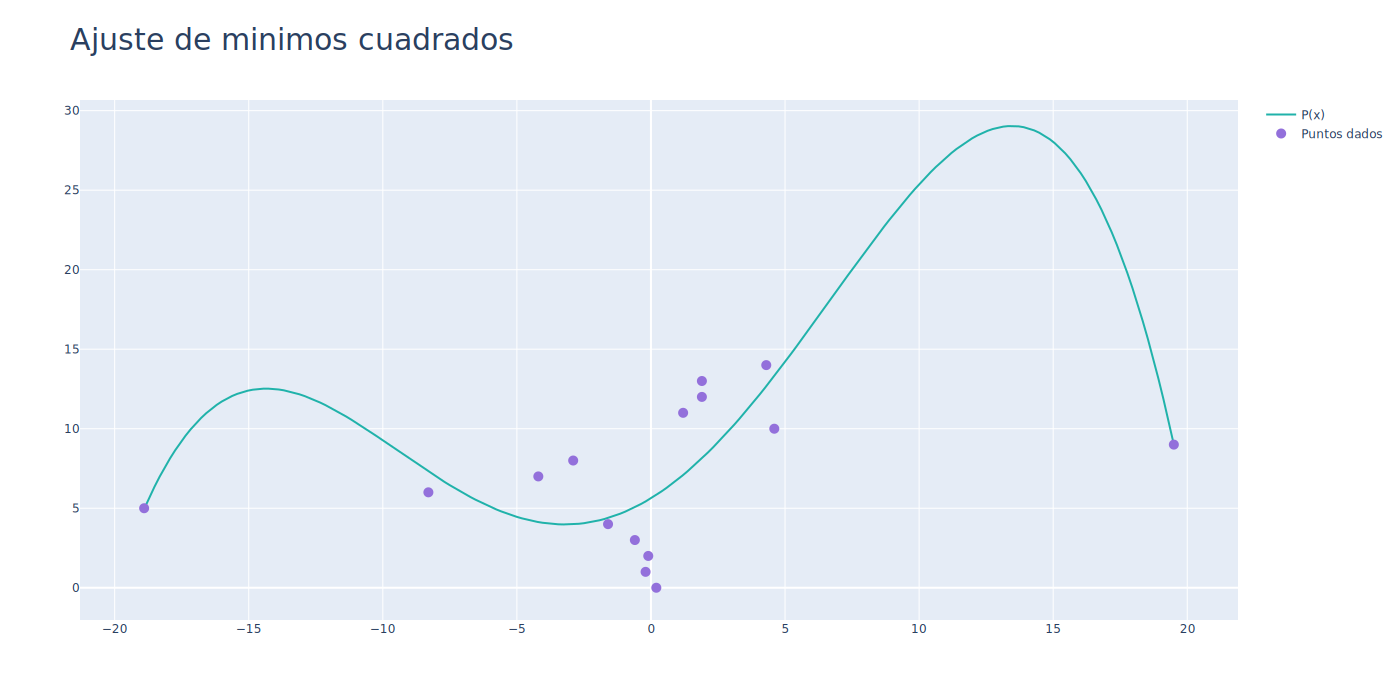

***Polinomio



<IPython.core.display.Latex object>

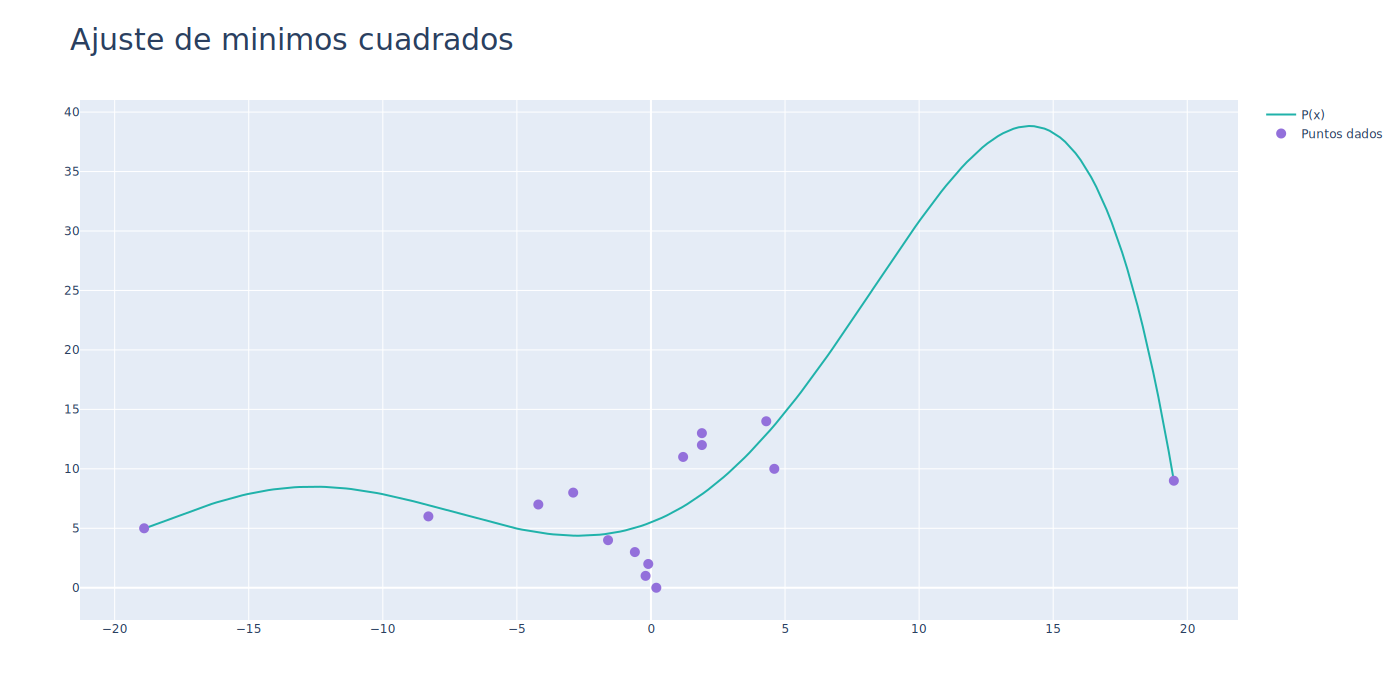

***Polinomio



<IPython.core.display.Latex object>

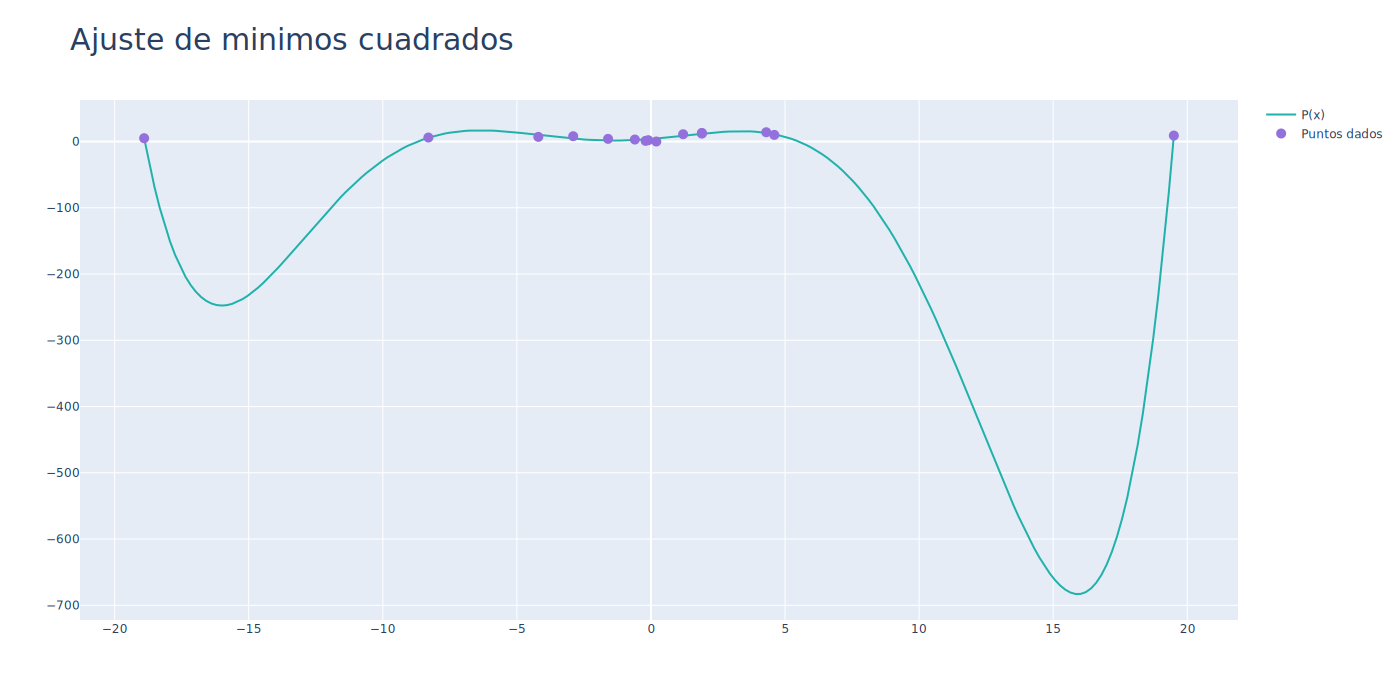

***Polinomio



<IPython.core.display.Latex object>

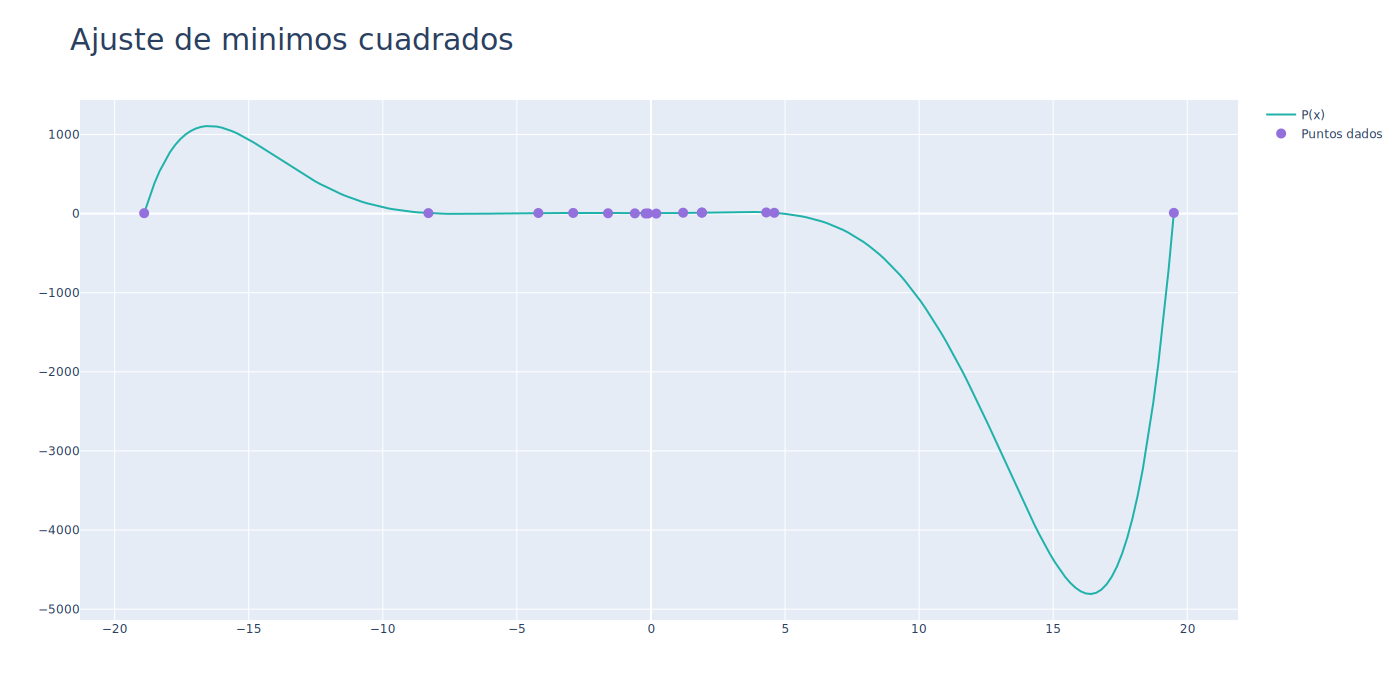

***Polinomio



<IPython.core.display.Latex object>

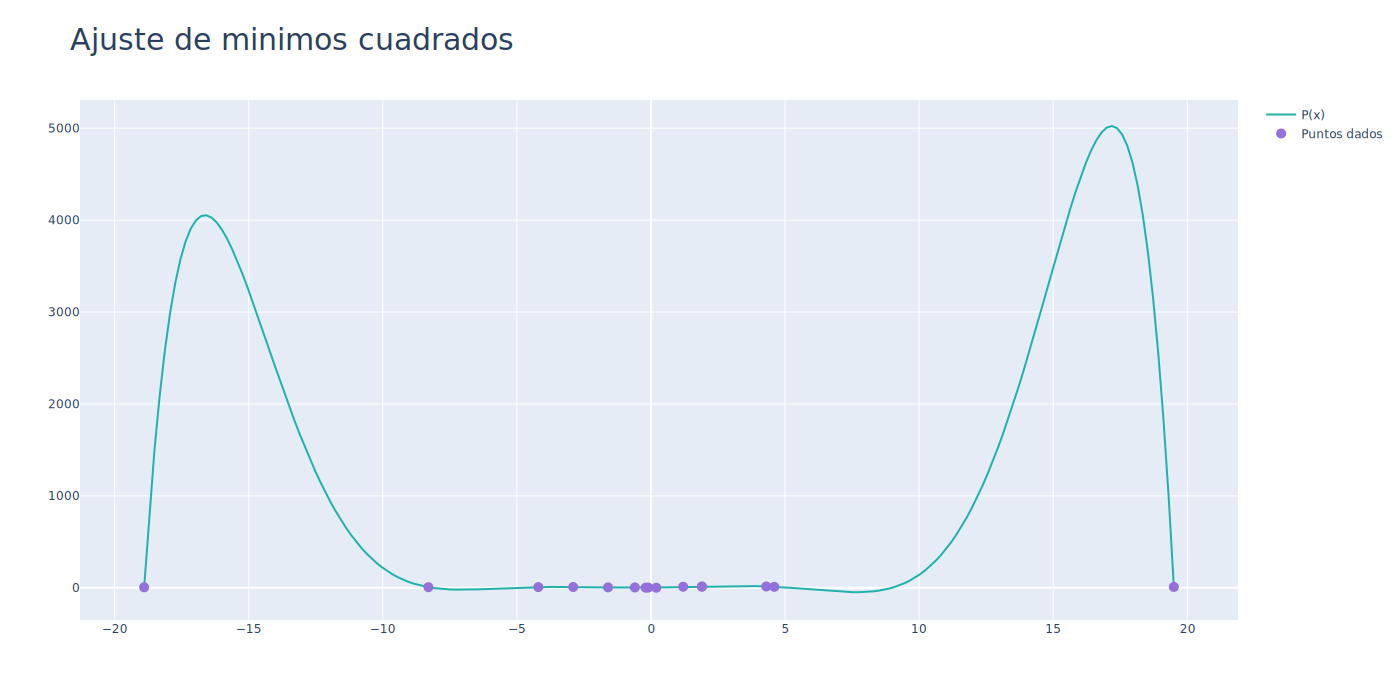

***Polinomio



<IPython.core.display.Latex object>

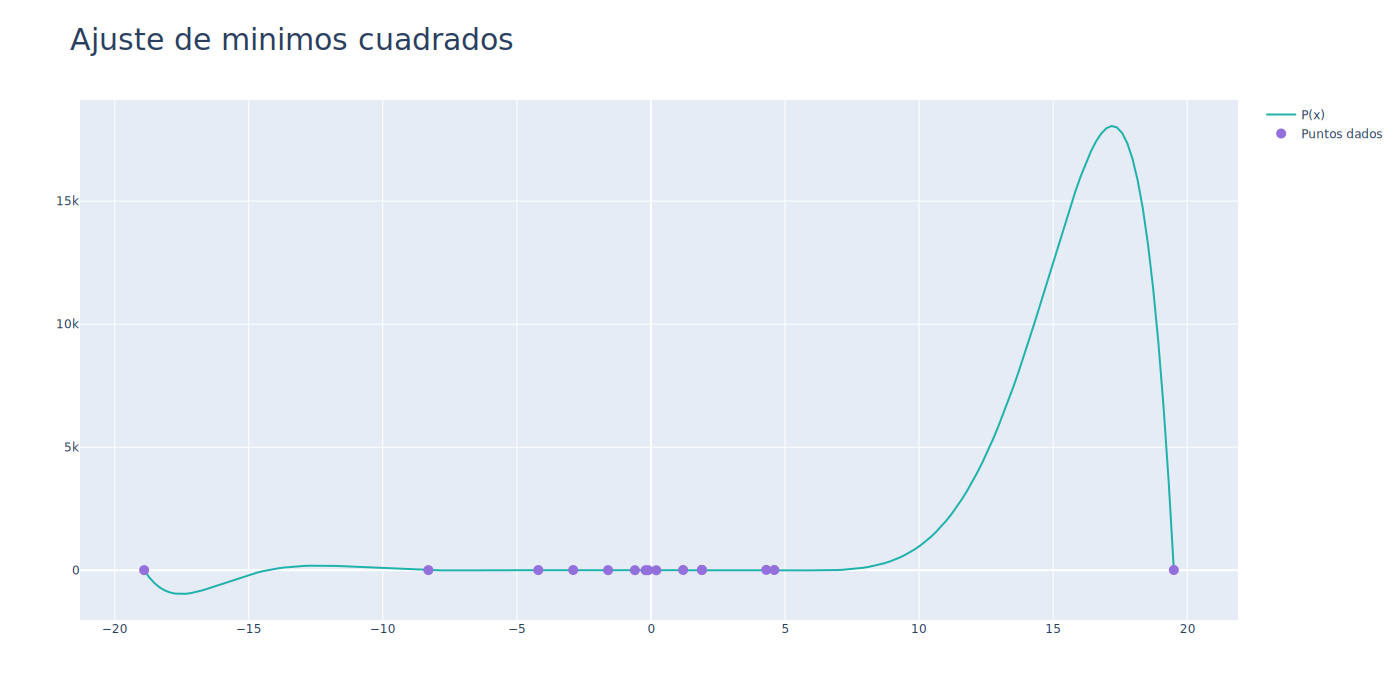

***Polinomio



<IPython.core.display.Latex object>

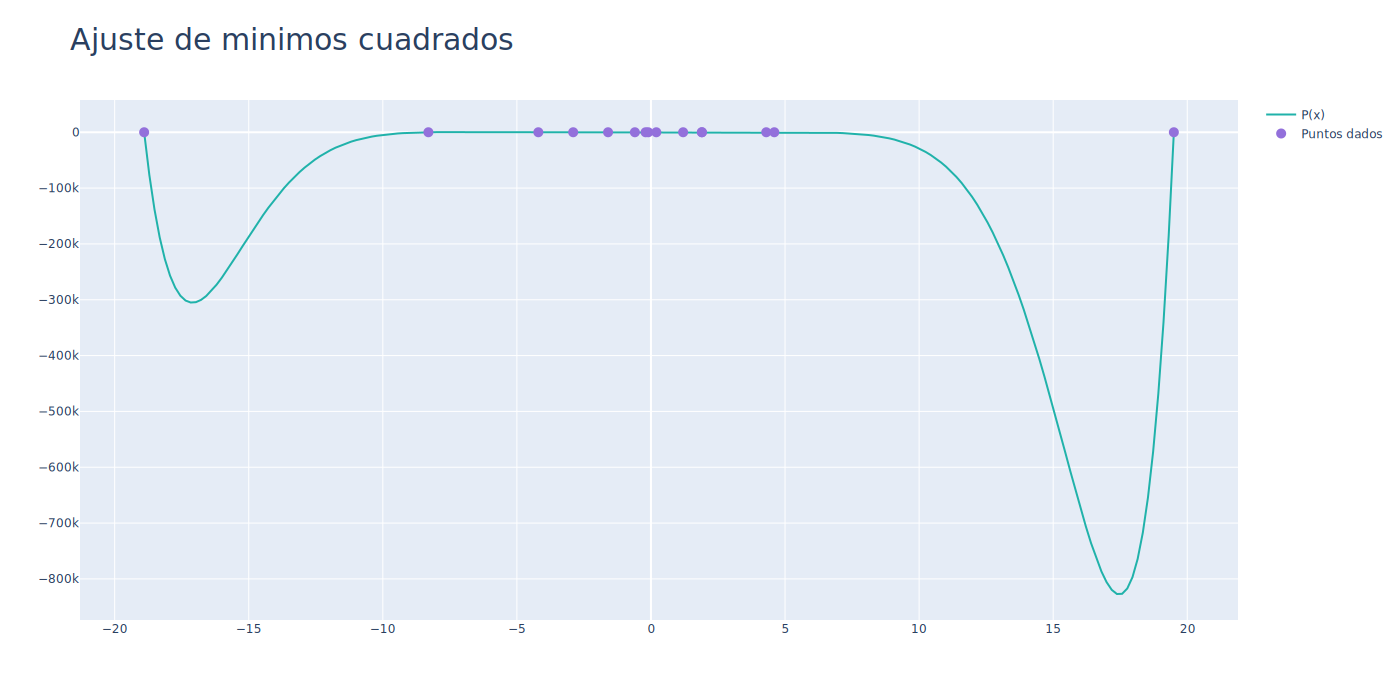

In [9]:
pbi_ruta = 'https://raw.githubusercontent.com/Alberto0410/Proyecto-Final-An-lisis-Num-rico/main/crecimiento-PBI.csv'
pbi = pd.read_csv(pbi_ruta)

#Agragamos una columna para asociar cada trimestre con un numero 
pbi['Trimestre_num'] = [i for i in range(len(pbi))]

X = pbi['Porcentaje de crecimiento  del Producto Interno Bruto']
y = pbi['Trimestre_num']


residuos = []
for i in range(11):
  res = ec_norma_grad(X, y, i)
  residuos.append(res)

In [10]:
residuos

[280.0,
 251.2622682619685,
 251.1658771858157,
 218.80585021650288,
 163.17633458280739,
 162.1637425912652,
 64.39676542025462,
 25.04639805151987,
 20.250278536382435,
 20.078040403833946,
 16.006785179077394]

c) ¿Qué polinomio ajusta mejor los datos?

Vemos que conforme vamos aumentando el grado del polinomio, los residuos van haciendo más y más chicos, por lo que el polinomio que mejor ajusta es el de grado 10

**Ejercicio 3.** El archivo “poblacion-mexico.csv” contiene los datos de la cantidad de personas que han vivido en México en distintos años. Realiza lo siguiente:

a) Elabora un programa que genere polinomios $P(x)$ de grado $n$, con $n = 1, 3, 7, 10$, que ajusten los datos de la cantidad de población como función de los años de registro; es decir $x ∈ [1910, 2020]$

b) Muestra la gráfica de cada polinomio y los datos ajustados.

In [11]:
poblacion_ruta = 'https://raw.githubusercontent.com/Alberto0410/Proyecto-Final-An-lisis-Num-rico/main/poblacion-mexico.csv'
pobmex = pd.read_csv(poblacion_ruta,  thousands=',')

pobmex.head()

,Periodo,Número de personas
0,1910,15160369
1,1921,14334780
2,1930,16552722
3,1940,19653552
4,1950,25791017


***Polinomio



<IPython.core.display.Latex object>

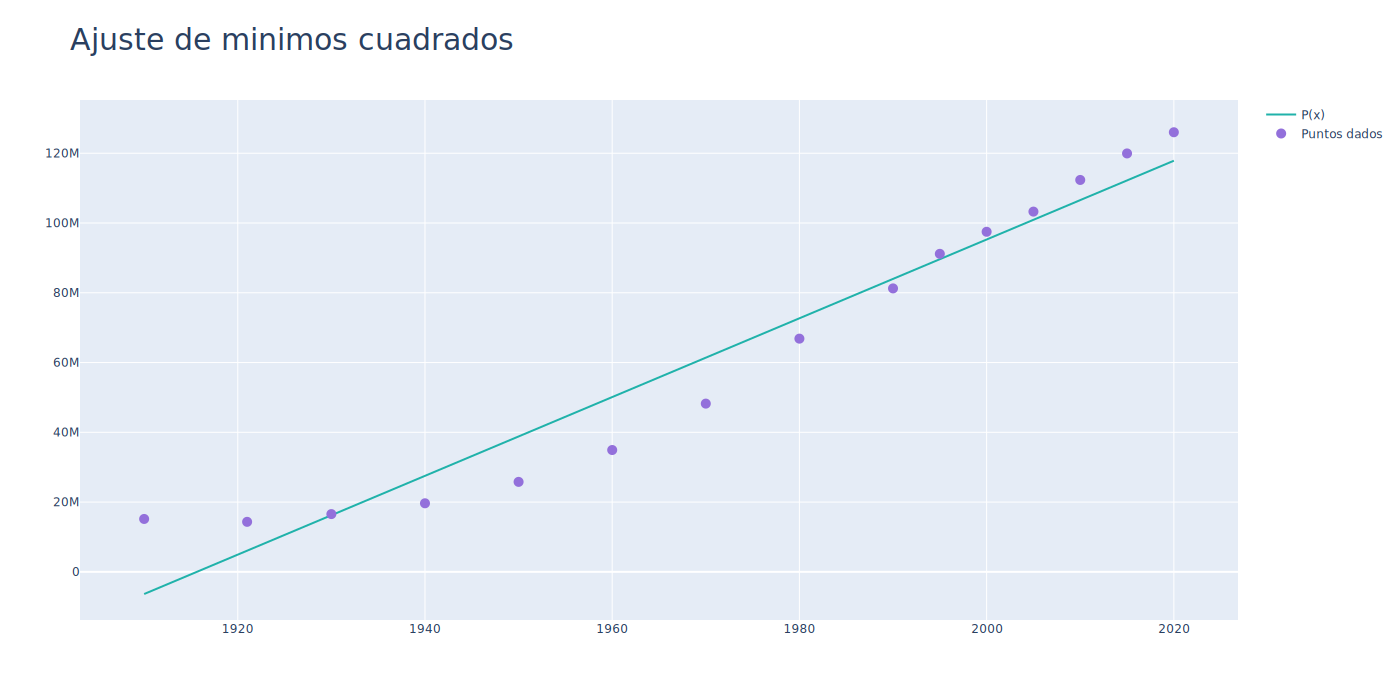

***Polinomio



<IPython.core.display.Latex object>

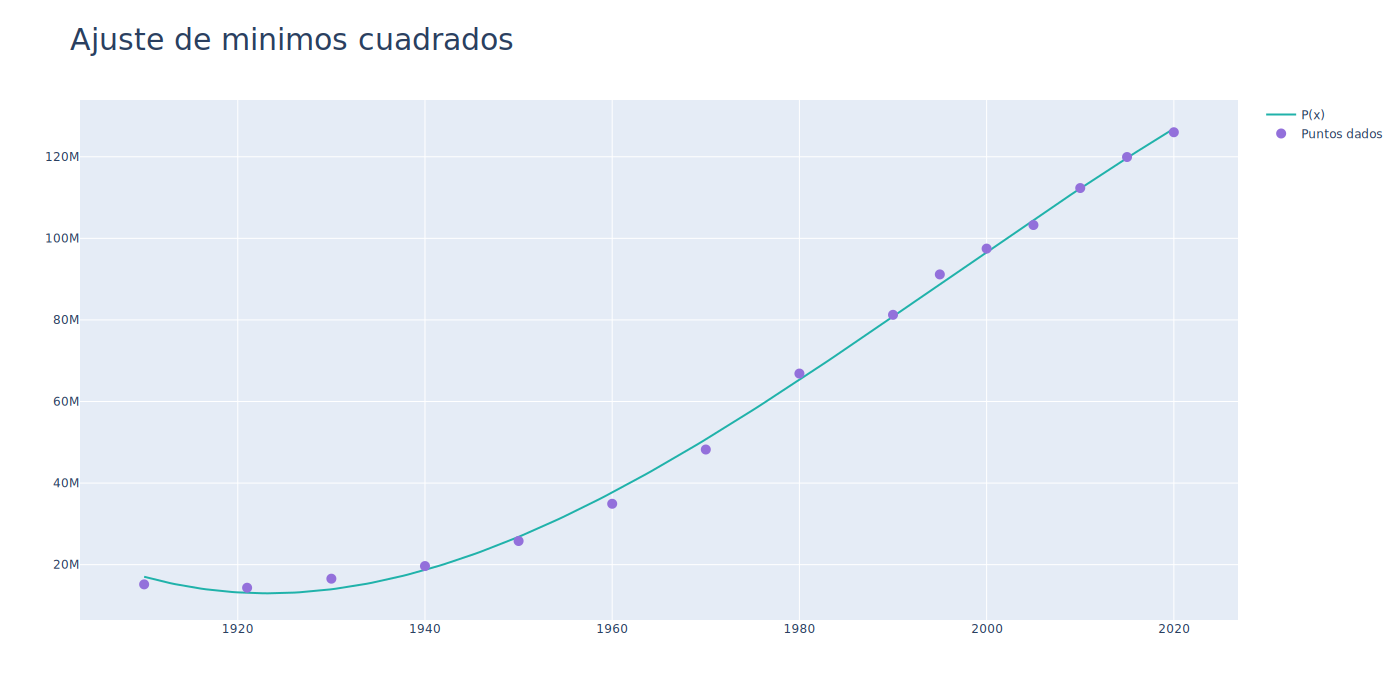

***Polinomio



<IPython.core.display.Latex object>

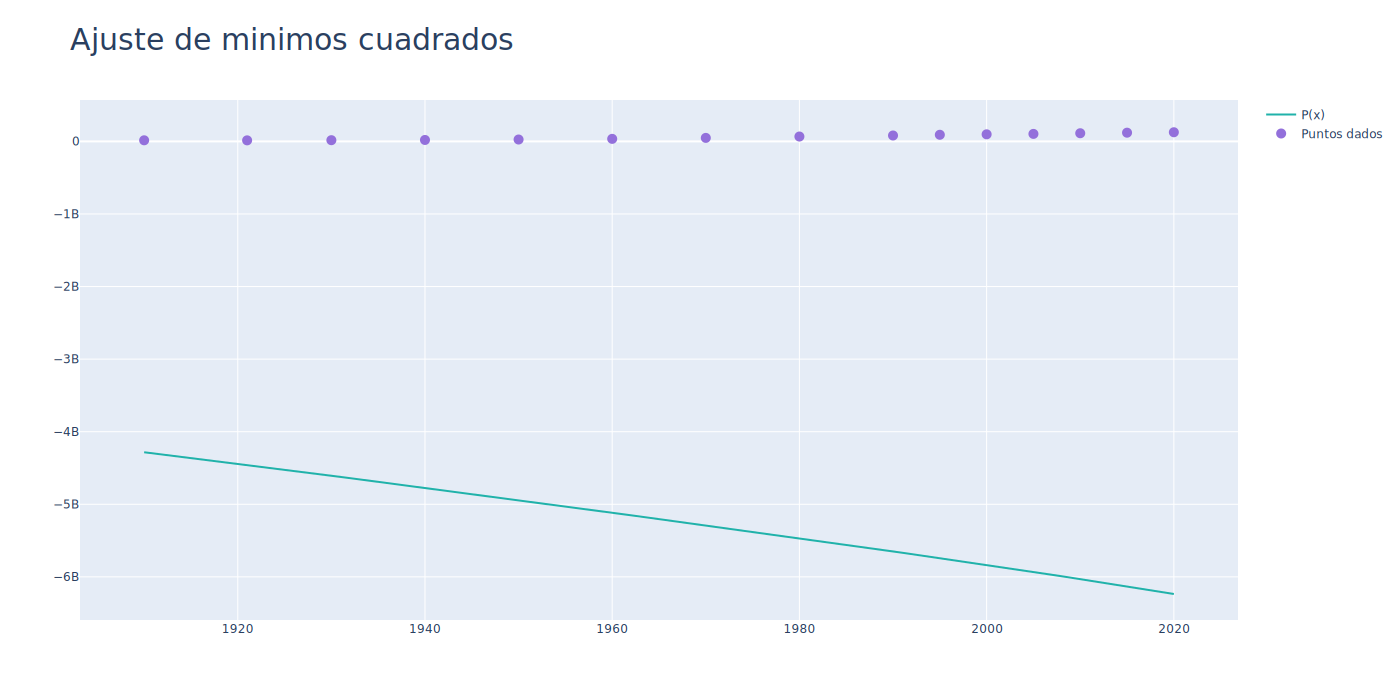

***Polinomio



<IPython.core.display.Latex object>

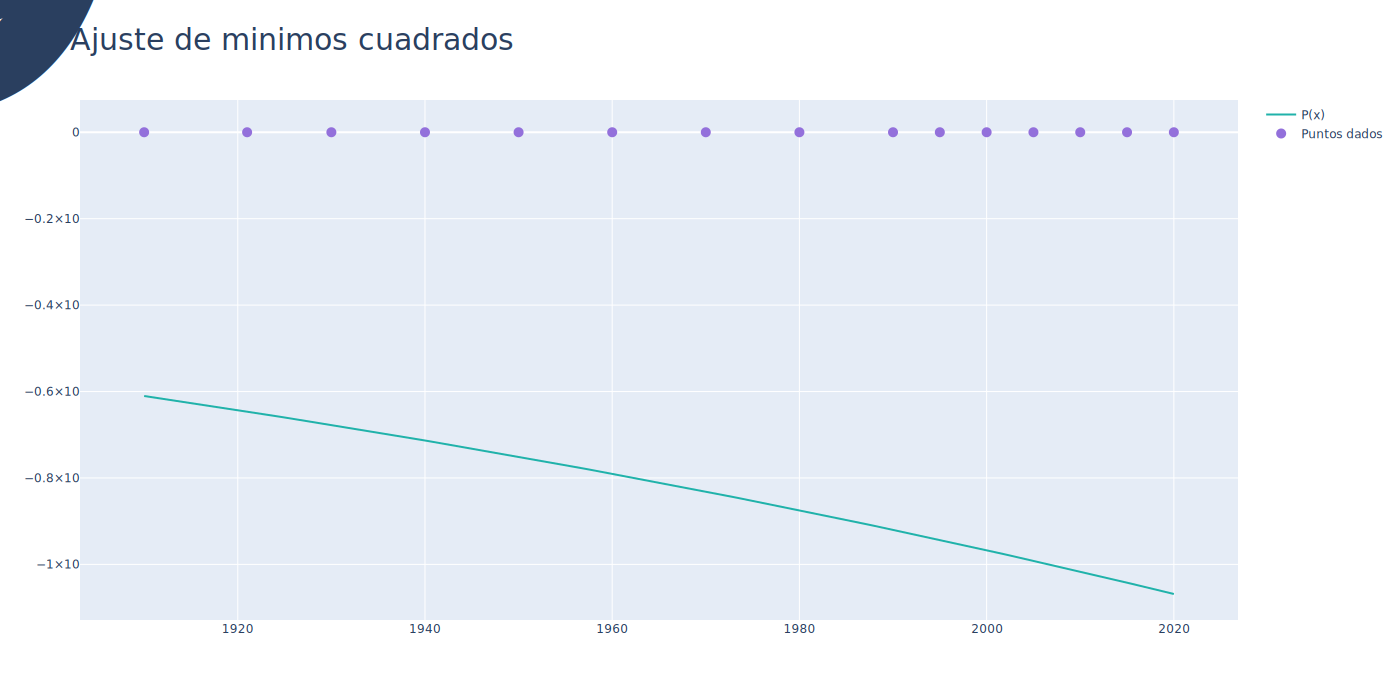

In [12]:
X = pobmex['Periodo'] # x ∈ [1910, 2020]
y = pobmex['Número de personas']

n = [1,3,7,10]
for i in n:
  ec_norma_grad(X, y, i)

c) ¿Qué polinomio es mejor para ajustar los datos?

El polonimio que ajusta mejor los datos será el de grado 3:
$P(x) = −101.476768859614x^3 +607458.716188572x^2−1210532957.21238x+803141869459.168$
Dado que la matriz de Vandermonde está mal condicionada, entonces los polinomios de grado 6 para delante ya no ajustan correctamente.

d) ¿Cuál es la tendencia del crecimiento de la población mexicana?

La población mexicana ha aumentado, es decir su tendencia de crecimiento va a la alta.

### <font color=greenn> **Integración Numérica**
**Ejercicio 4.** El archivo “industria-construccion.cvs” contiene los datos del valor de la producción (en miles de pesos) de la industria de la construcción del país, de enero de 2006 a marzo de 2022. Para obtener el valor total acumulado de la producción debida a la construcción de manera aproximadamente continua podemos calcular una integral numérica. Entonces, realiza lo siguiente:

a) Elabora un programa que calcule la integral numérica por medio de una regla de integración compuesta. Utiliza la regla de integración compuesta de tu preferencia; asigna el nodo $x = 0$ al mes de enero de 2006, el nodo $x = 1$ al mes de febrero de 2006, y así sucesivamente.

In [13]:
construccion_ruta = 'https://raw.githubusercontent.com/Alberto0410/Proyecto-Final-An-lisis-Num-rico/main/industria_construccion.csv'
construccion = pd.read_csv(construccion_ruta, encoding = 'latin-1')

#Eliminamos los NaN
construccion = construccion[:-5]

#Asociamos a cada mes un numero
construccion['Periodos_num'] = [i for i in range(len(construccion))]

#Usando la regla del trapecio con h = 1, pues entre cada mes hay un natural
valores = np.array(construccion['Indicadores económicos'])
valores[0] = (1/2)*valores[0]
valores[-1] = (1/2)*valores[-1]

integral = sum(valores)
print(integral)

6353482838.514997


La integral mediante la regla del trapecio compuesta da un resultado de $6353482838.514997$

b) Calcula el valor total de la producción por construcción simplemente sumando los valores mensuales desde enero de 2006 a marzo de 2022.

In [11]:
valor_total = sum(construccion['Indicadores económicos'])
print(valor_total)

6383374345.769996


c) Compara los resultados de a) y b).

El valor total de la producción por construcción es claramente mayor al valor de la integral por el método de la regla compuesta del trapecio. Lo anterior se debe a que, por construcción de la regla, multiplicamos el primer y último valor de la función por $1/2$, lo cual hace que al sumar todo nos de un valor más chico a comparación de si sumamos todo sin multiplicar por $1/2$ el primer y último valor